<a href="https://colab.research.google.com/github/alihasan313/psd/blob/main/psd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [ ]:
import pandas as pd

# Pastikan pemisah sesuai dengan data
data = pd.read_csv('/content/Muatan barang penerbangan domistik.csv', sep=';')

# Tampilkan hasil untuk mengecek tampilannya
print(data.head())


ParserError: Error tokenizing data. C error: Expected 1 fields in line 141, saw 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      216 non-null    object 
 1   Barang(TON)  216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
data.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,121.000000,121.000000,121.000000,121.000000
mean,5.225207,5.178678,5.430207,4.972107
std,2.275320,2.260763,2.351653,2.187406
min,1.985000,1.910000,2.070000,1.850000
25%,2.890000,2.860000,3.100000,2.790000
50%,5.200000,5.200000,5.400000,4.720000
75%,6.760000,6.760000,7.060000,6.480000
max,9.550000,9.400000,9.775000,9.300000


In [ ]:
data.isnull().sum()

,0
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol.,0


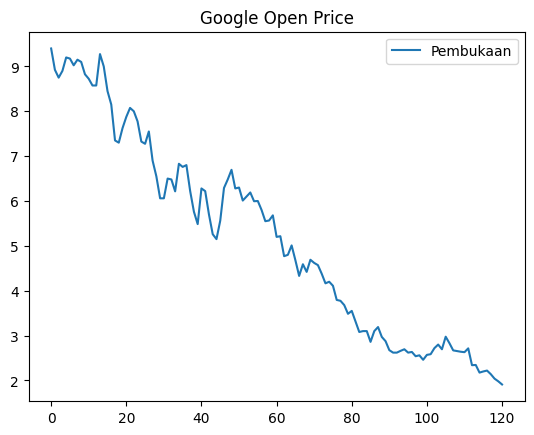

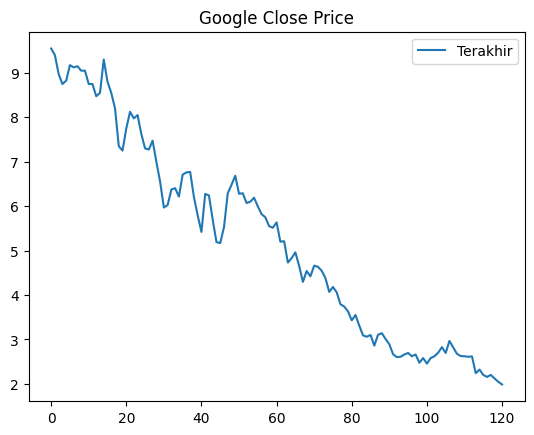

In [ ]:
data[['Pembukaan']].plot()
plt.title('Harga Buka')
plt.show()

data[['Terakhir']].plot()
plt.title('Harga Penutupan')
plt.show()

# Data Processing

In [ ]:
# Mengonversi kolom Tanggal menjadi datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')

In [ ]:
# Fungsi untuk mengonversi volume
def convert_volume(vol):
    # Hapus koma dari string
    vol = vol.replace(',', '')
    if 'B' in vol:
        return float(vol.replace('B', '')) * 1e9
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1e6
    else:
        return float(vol)

# Terapkan fungsi ke kolom 'Vol.'
data['Vol.'] = data['Vol.'].apply(convert_volume)

# Periksa tipe data setelah konversi
print(data['Vol.'].dtype)  # Seharusnya menunjukkan float64


float64


In [ ]:
plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(),annot=True, linewidth=.5,)

In [ ]:
X = data[['Tertinggi','Terendah','Pembukaan','Vol.']].values
y = data['Terakhir'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)


In [ ]:
regressor = LinearRegression()


In [ ]:
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(regressor.coef_)


[ 5.90840357e-01  7.69914874e-01 -3.58543629e-01 -5.22915045e-13]


In [ ]:
print(regressor.intercept_)


0.11977235304524392


In [ ]:
predicted = regressor.predict(X_test)


In [ ]:
print(predicted)


[2.64116216 6.1473338  5.51015811 2.16758231 3.82573859 4.86137172
 6.2374706  3.27029797 6.79865223 2.60360373 2.65485953 2.38932652
 8.89035999 3.11419987 2.3304508  5.39169011 2.07381838 2.85709807
 4.34836445 4.99957966 2.31803758 7.92588029 2.72019809 2.68059493
 4.42130209 2.73053324 6.86825372 4.94255842 2.64201045 2.26818956
 6.20932909 6.06851816 5.54879019 4.45574864 8.50553971 5.96350958
 6.36868934]


In [ ]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})


In [ ]:
prices = data['Terakhir'].tolist()
initial = (data['Pembukaan']).tolist()

#Convert to 1d Vector
prices = np.reshape(prices, (len(prices), 1))
initial = np.reshape(initial, (len(initial), 1))

In [ ]:
data1.head(20)


,Actual,Predicted
0,2.620,2.641162
1,6.190,6.147334
2,5.515,5.510158
3,2.120,2.167582
4,3.790,3.825739
5,5.525,4.861372
6,6.025,6.237471
7,3.310,3.270298
8,6.480,6.798652
9,2.580,2.603604


In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.12243349473020308
Mean Squared Error: 0.03354786087465327
Root Mean Squared Error: 0.1831607514579837


In [ ]:
graph = data1.head(20)


<Axes: >

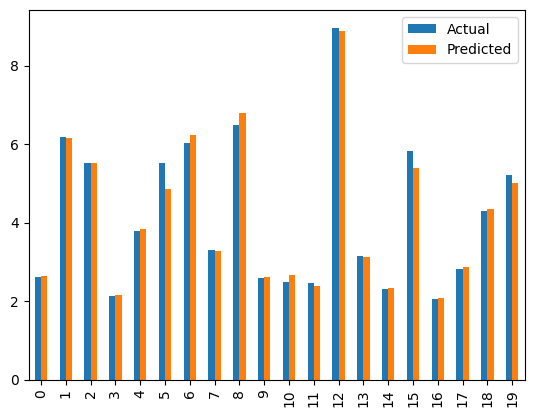

In [ ]:
graph.plot(kind='bar')


<ipython-input-45-e0686652ca4d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pembukaan'], hist = False, kde = True, kde_kws = {'linewidth': 5},label='Pembukaan',)
<ipython-input-45-e0686652ca4d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Terakhir'], hist =

Text(0, 0.5, 'Density')

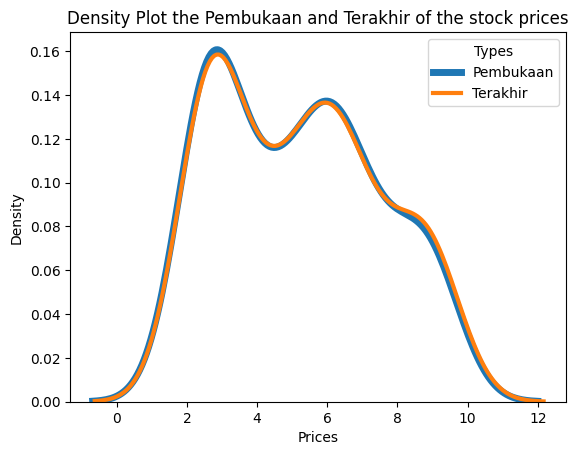

In [ ]:
sns.distplot(data['Pembukaan'], hist = False, kde = True, kde_kws = {'linewidth': 5},label='Pembukaan',)
sns.distplot(data['Terakhir'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='Terakhir')

plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot the Pembukaan and Terakhir of the stock prices')
plt.xlabel('Prices')
plt.ylabel('Density')

Train-set / R2 score: 0.9859246506080964


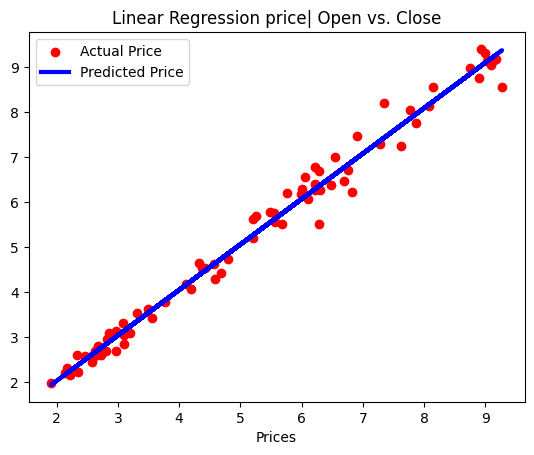

Test-set/ R2 score: 0.9868686198581689


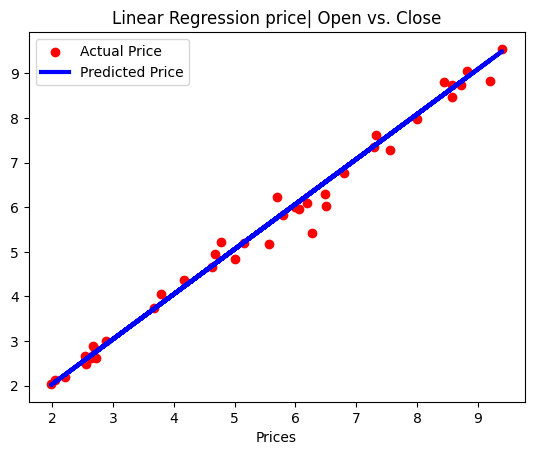

In [ ]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()